In [1]:
import pandas as pd
import numpy as np
#실제 그래프를 그릴 수 있는 서브 함수
import matplotlib.pyplot as plt
import seaborn as sns

#경고표시 생략(일시적으로 생략하는게 좋음) 
import warnings
warnings.filterwarnings(action='ignore')

#한글폰트 지정 
import matplotlib.font_manager as fm
font_name= fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font",family=font_name)

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

# 머신러닝을 위한 모듈 
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, cross_validate

import mglearn

from sklearn.model_selection import KFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.datasets import load_breast_cancer, load_boston,load_iris

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate 

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.metrics import precision_score, recall_score

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

import mglearn
from sklearn.datasets import load_breast_cancer, load_boston, load_iris, make_moons
from sklearn.datasets import load_digits, load_diabetes, load_wine

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# conda install -c anaconda py-xgboost
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

# pip install lightgbm
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_tree, plot_metric

from sklearn.svm import SVR, SVC

import statsmodels.api as sm

import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files\\Graphviz\\bin"
from sklearn.tree import export_graphviz
import graphviz


# 1. 특징

- 분류 알고리즘 중 가장 우수하고, 가장 복잡한 
- 회귀, 분류 이상치 탐지 등에 사용하는 지도학습 방법
- 클래스 사이에 위치한 데이터 포인터를 서포터 벡터라고 한다.
- 각 서포터 백터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지 를 학습
- 각 서포트 벡터의 거리와 마진이 가장 큰 방향으로 학습 
- 서포트 벡터까지의 거리와 서포트 백터의 중요도를 기반으로 예측을 수행 
- 괄련 클래스 
    - 회귀, 분류:SVR,SVC
    - 선형,비선형 : LinearSVC, LinearSVR, KernelSVC, KernelSVR

(100, 2)

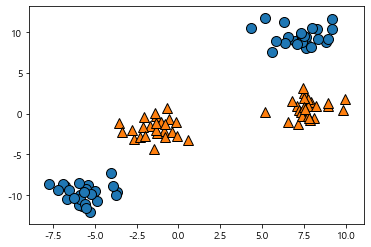

In [14]:
X,y = mglearn.datasets.make_blobs(centers=4,random_state=8)
y= y%2 # 데이터를 두가지로 나눔 
mglearn.discrete_scatter(X[:,0],X[:,1],y)
X.shape

# 선으로 구분할 방법이 없을때 어떡해야하나?


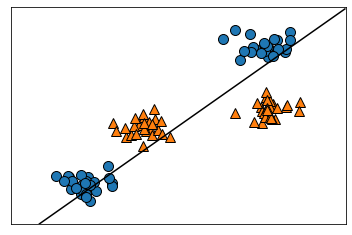

In [13]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
mglearn.plots.plot_2d_separator(linear_svm,X)
# 도저히 선으로 답이 안나옴

In [15]:
# 수평면이라 해서 3차원으로 맵핑
# 수평으로 쌓아 주는 것
X_new = np.hstack([X,X[:,1:]**2])
X_new

array([[-1.72161036e+00, -1.48033142e+00,  2.19138111e+00],
       [-3.65733840e+00, -9.54823830e+00,  9.11688546e+01],
       [ 7.07781630e+00,  9.95087718e-01,  9.90199567e-01],
       [-1.36579859e+00, -3.14862498e-01,  9.91383928e-02],
       [-2.66521206e+00, -3.12591651e+00,  9.77135405e+00],
       [ 7.63027116e+00,  8.69797933e+00,  7.56548444e+01],
       [-5.27144331e+00, -1.21188070e+01,  1.46865483e+02],
       [ 7.91767139e+00,  1.41547387e+00,  2.00356628e+00],
       [-1.41284184e+00,  1.12963480e-01,  1.27607478e-02],
       [-1.01519039e+00, -1.03318203e+00,  1.06746511e+00],
       [ 8.26341570e+00,  1.03472344e+01,  1.07065259e+02],
       [ 6.96767867e+00,  8.96225230e+00,  8.03219662e+01],
       [-8.47792492e-01, -2.12185612e+00,  4.50227339e+00],
       [ 7.48006237e+00,  2.49392925e+00,  6.21968311e+00],
       [ 7.71454967e+00,  1.84207010e+00,  3.39322225e+00],
       [-7.74064658e+00, -8.61800744e+00,  7.42700522e+01],
       [-5.41087235e+00, -8.71941280e+00

Text(0.5, 0, '특성 1**2')

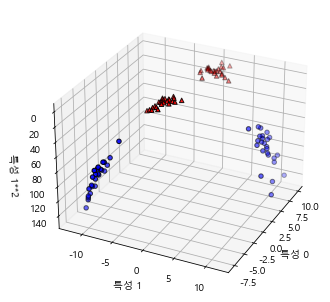

In [22]:
from mpl_toolkits.mplot3d import Axes3D,axes3d
figure = plt.figure()
ax = Axes3D(figure,elev=-152,azim=-26)

mask = (y == 0) # 정답이 0 인 것만 mask에 들어감 
mask

ax.scatter(X_new[mask, 0],X_new[mask,1],X_new[mask,2],c = 'b',cmap=mglearn.cm2,edgecolors='k')
ax.scatter(X_new[~mask, 0],X_new[~mask,1],X_new[~mask,2],c = 'r',cmap=mglearn.cm2,
           edgecolors='k',marker='^')
ax.set_xlabel('특성 0')
ax.set_ylabel('특성 1')
ax.set_zlabel('특성 1**2')

Text(0.5, 0, '특성1 ** 2')

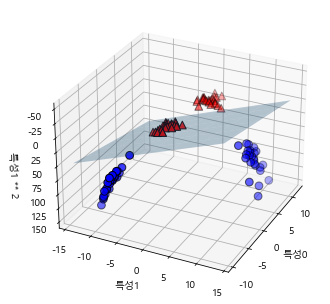

In [23]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")


Text(0, 0.5, '특성 1')

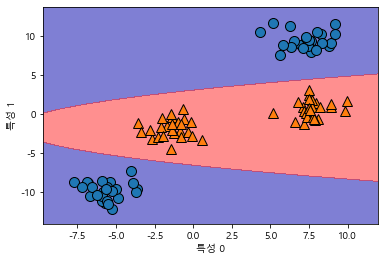

In [24]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()]) # ravel 다차원을 1차원으로 바꿀때 
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], 
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")


## 2. 어떤 파라미터를 써야 하는가? 

+ cost 
    - decision boundry와 마진의 간격을 어느정도로 할지를 결정함.
    - cost가 작으면 마진은 넓어진다. 
        
+ gamma
    - 훈련 데이터 하나 당 영향을 끼치는 범위를 조절하는 변수 
    - gamma가 작을수록 영향을 끼치는 범위가 넓어진다. 


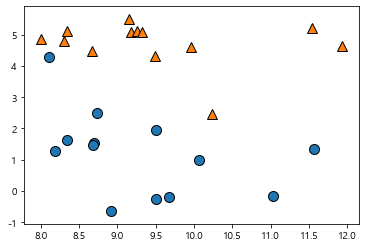

In [26]:
X,y =mglearn.tools.make_handcrafted_dataset()
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [31]:
svm=SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y)

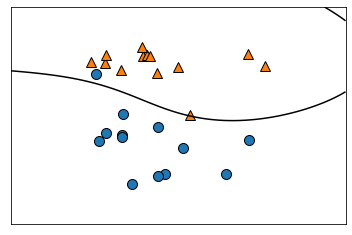

In [32]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
mglearn.plots.plot_2d_separator(svm,X)

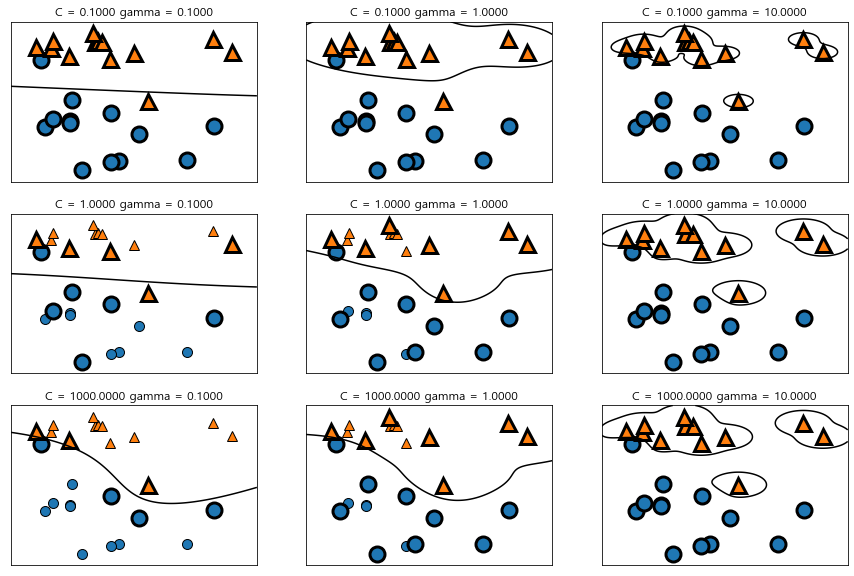

In [33]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C = C, log_gamma = gamma, ax=a)


## 3. SVM 클래스의 종류

### (1) 회귀모델과 분류 모델

#### 1) 회귀 모델(SVR)

In [36]:
X,y = load_boston(return_X_y = True) # return --> 데이터, 타겟 따로 뽑을 필요 없음
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123)

model = SVR()
model.fit(X_train,y_train)

print('학습결과 :',model.score(X_train,y_train))
print('테스트결과 :',model.score(X_test,y_test))

학습결과 : 0.21772837063748762
테스트결과 : 0.13544178468518187


#### 2) 분류 모델

In [37]:
X,y = load_breast_cancer(return_X_y = True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123)

model = SVC()
model.fit(X_train,y_train)

print('학습결과 :',model.score(X_train,y_train))
print('테스트결과 :',model.score(X_test,y_test))

학습결과 : 0.9014084507042254
테스트결과 : 0.9230769230769231


### (2) 커널기법

+ 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
+ scikit-learn에서는 Linear, Polynominal,RBF(Radial Basis Function) 등 다양한 커널 기법을 지원

In [41]:
##### 회귀모델에서 확인 

X,y = load_boston(return_X_y = True) # return --> 데이터, 타겟 따로 뽑을 필요 없음
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123)

linear_svr = SVR(kernel = 'linear')
linear_svr.fit(X_train,y_train)

print('학습결과 :',linear_svr.score(X_train,y_train))
print('테스트결과 :',linear_svr.score(X_test,y_test))

polynomial_svr =SVR(kernel ='poly')
polynomial_svr.fit(X_train,y_train)

print('학습결과 :',polynomial_svr.score(X_train,y_train))
print('테스트결과 :',polynomial_svr.score(X_test,y_test))

rbf_svr = SVR(kernel = 'rbf')
rbf_svr.fit(X_train,y_train)
print('학습결과 :',rbf_svr.score(X_train,y_train))
print('테스트결과 :',rbf_svr.score(X_test,y_test))

학습결과 : 0.7155066205123104
테스트결과 : 0.6380398541381507
학습결과 : 0.2024454261446289
테스트결과 : 0.133668450367462
학습결과 : 0.21772837063748762
테스트결과 : 0.13544178468518187


In [51]:
##### 분류모델서 확인 
X,y = load_breast_cancer(return_X_y = True) # return --> 데이터, 타겟 따로 뽑을 필요 없음
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123)

linear_svc = SVC(kernel = 'linear')
linear_svc.fit(X_train,y_train)

print('학습결과 :',linear_svc.score(X_train,y_train))
print('테스트결과 :',linear_svc.score(X_test,y_test))

polynomial_svc =SVC(kernel ='poly')
polynomial_svc.fit(X_train,y_train)

print('학습결과 :',polynomial_svc.score(X_train,y_train))
print('테스트결과 :',polynomial_svc.score(X_test,y_test))

rbf_svc = SVC(kernel = 'rbf')
rbf_svc.fit(X_train,y_train)
print('학습결과 :',rbf_svc.score(X_train,y_train))
print('테스트결과 :',rbf_svc.score(X_test,y_test))


학습결과 : 0.960093896713615
테스트결과 : 0.986013986013986
학습결과 : 0.9014084507042254
테스트결과 : 0.9230769230769231
학습결과 : 0.9014084507042254
테스트결과 : 0.9230769230769231


### (3) 매개변수 튜닝

+ SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
+ 매개변수를 변경하면서 성능변화를 관찰 

In [52]:
##### polynomial 기법 사용
polynomial_svc = SVC(kernel='poly',C=0.1,gamma='auto')
polynomial_svc.fit(X_train,y_train)

print('kernel=poly, C={},gamma={}'.format(0.1,'auto'))
print('polynomial 학습결과 :',polynomial_svc.score(X_train,y_train))
print('polynomial 테스트결과 :',polynomial_svc.score(X_test,y_test))

kernel=poly, C=0.1,gamma=auto
polynomial 학습결과 : 0.971830985915493
polynomial 테스트결과 : 0.986013986013986


In [57]:
##### rbf
rbf_svc = SVC(kernel='rbf',C=0.1,gamma='auto')
rbf_svc.fit(X_train,y_train)

print('kernel=rbf, C={},gamma={}'.format(0.1,'auto'))
print('rbf 학습결과 :',rbf_svc.score(X_train,y_train))
print('rbf 테스트결과 :',rbf_svc.score(X_test,y_test))

kernel=rbf, C=0.1,gamma=auto
rbf 학습결과 : 0.6291079812206573
rbf 테스트결과 : 0.6223776223776224


In [58]:
##### rbf
rbf_svc = SVC(kernel='rbf',C=10,gamma='scale') # gamma='scale' 자체적으로 전처리를 했다는 것. 
rbf_svc.fit(X_train,y_train)

print('kernel=rbf, C={},gamma={}'.format(10,'scale'))
print('rbf 학습결과 :',rbf_svc.score(X_train,y_train))
print('rbf 테스트결과 :',rbf_svc.score(X_test,y_test))

kernel=rbf, C=10,gamma=scale
rbf 학습결과 : 0.92018779342723
rbf 테스트결과 : 0.9300699300699301


### (4) 데이터 전처리

+ SVM은 입력 데이터가 정규화되어야 좋은 성능을 보인다. 
+ 주로 모든 특성값을 0,1 범위로 맞추는 방법을 사용한다.
+ sklearn의 StandardScaler 또는 MinMaxScaler 사용 
+ 정규화나 표준화에 영향을 받지 않는 알고리즘 --> decision tree

In [17]:
X,y = load_breast_cancer(return_X_y = True) # return --> 데이터, 타겟 따로 뽑을 필요 없음
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123)

In [18]:
### 튜닝 없이

model=SVC()
model.fit(X_train,y_train)

print('학습결과 : ',model.score(X_train,y_train))
print('테스트결과 : ',model.score(X_test,y_test))

학습결과 :  0.9014084507042254
테스트결과 :  0.9230769230769231


In [19]:
## 표준화 
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std =scaler.transform(X_test)

In [20]:
model=SVC()
model.fit(X_train_std,y_train)

print('학습결과 : ',model.score(X_train_std,y_train))
print('테스트결과 : ',model.score(X_test_std,y_test))

학습결과 :  0.9835680751173709
테스트결과 :  0.986013986013986


In [21]:
scaler = MinMaxScaler()
X_train_mms = scaler.fit_transform(X_train)
X_test_mms =scaler.transform(X_test)

In [22]:
model=SVC()
model.fit(X_train_mms,y_train)

print('학습결과 : ',model.score(X_train_mms,y_train))
print('테스트결과 : ',model.score(X_test_mms,y_test))

학습결과 :  0.9812206572769953
테스트결과 :  0.986013986013986


In [23]:
### 수작업
min = X_train.min(axis=0)
range = (X_train -min).max(axis=0)

X_train_cus=(X_train-min)/range
X_test_cus=(X_test-min)/range

In [24]:
model=SVC()
model.fit(X_train_cus,y_train)

print('학습결과 : ',model.score(X_train_cus,y_train))
print('테스트결과 : ',model.score(X_test_cus,y_test))

학습결과 :  0.9812206572769953
테스트결과 :  0.986013986013986


### (5) LinearSVR

#### 1) Boston Housing Sample

In [37]:
X,y = load_boston(return_X_y = True) 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)
# 난수 고정 안됨 --> 실행할때 마다 변함.

In [38]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
model = SVR(kernel='linear')
model.fit(X_train,y_train)

SVR(kernel='linear')

In [40]:
print('학습결과 : ',model.score(X_train,y_train))
print('테스트결과 : ',model.score(X_test,y_test))

학습결과 :  0.7021632037584149
테스트결과 :  0.7710675552799985


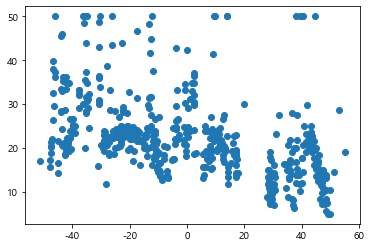

In [48]:
##### 차원 축소(feature(변수)의 축소) --> 변수가 많을 때 효과가 큼 --> 회귀보단 분류쪽에 더 어울림
##### 최적의 변수들만 사용하자, 중요한 변수만 남기자 
from sklearn.manifold import TSNE

X_comp=TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y)

In [46]:
? TSNE

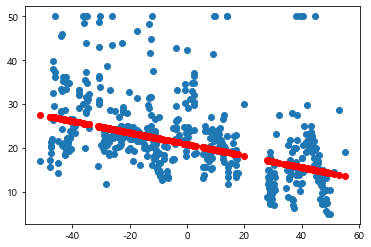

In [49]:
model.fit(X_comp,y)

predict = model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp,predict,color='r')

In [56]:
## 전처리 까지 포함, fit 이나 transform 들을 자동으로  
from sklearn.pipeline import make_pipeline
import multiprocessing   # 병렬 처리

estimator=make_pipeline(StandardScaler(),SVR(kernel='linear'))
cross_validate(estimator=estimator,
               X=X,
               y=y,
               cv=5,
               n_jobs=multiprocessing.cpu_count(),
              verbose=True) # cpu를 몇개 할 것인가?

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    4.4s finished


{'fit_time': array([0.08398104, 0.07194114, 0.04899168, 0.01796103, 0.03000641]),
 'score_time': array([0.00350785, 0.00302577, 0.0039916 , 0.00298619, 0.00498676]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [53]:
? cross_validate

In [55]:
multiprocessing.cpu_count()

4

In [63]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler',StandardScaler()),('model',SVR(kernel='linear'))])
params = [
    {
        'model__gamma':['scale','auto'],
        'model__C':[1.0,0.1,0.01],
        'model__epsilon':[1.0,0.1,0.01]
    }
]
gs = GridSearchCV(estimator=pipe,
                 param_grid=params,
                 n_jobs=multiprocessing.cpu_count(),
                 cv=5,
                 verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=4,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [58]:
?GridSearchCV

In [66]:
print(gs.best_params_) # 최적의 파라미터
print(gs.best_estimator_) # 어떤 모델을 사용하고 있는지 --> 앙상블일때 쓰면 좋음
print(gs.best_score_) # 전체 데이터로 봤을 때(훈련, 테스트 안나누고) 최적의 점수 

{'model__C': 0.1, 'model__epsilon': 1.0, 'model__gamma': 'scale'}
Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=1.0, kernel='linear'))])
0.49854468515516936


In [68]:
model = SVR(kernel='linear',C=0.1,gamma='scale',epsilon=1.0)
model.fit(X_train,y_train)

SVR(C=0.1, epsilon=1.0, kernel='linear')

In [69]:
print('학습결과 : ',model.score(X_train,y_train))
print('테스트결과 : ',model.score(X_test,y_test))

학습결과 :  0.6900261214784666
테스트결과 :  0.7708955957790928


#### 2) Diabetes Sample


In [79]:
X,y= load_diabetes(return_X_y=True)
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=.2,random_state=123)

In [80]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
model = SVR(kernel='linear')
model.fit(X_train,y_train)
print('학습결과 : ',model.score(X_train,y_train))
print('테스트결과 : ',model.score(X_test,y_test))

학습결과 :  0.4924588716811171
테스트결과 :  0.5570136940699909


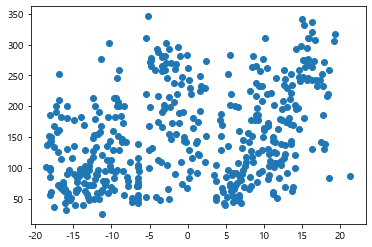

In [82]:
##### 차원축소해보기 
X_comp=TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y)

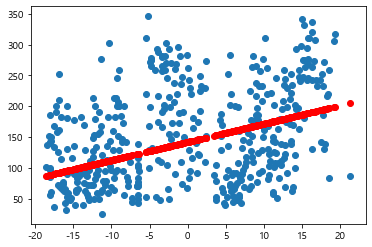

In [83]:
model.fit(X_comp,y)

predict = model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp,predict,color='r')

In [84]:
estimator = make_pipeline(StandardScaler(), SVR(kernel="linear"))
cross_validate(
    estimator=estimator,
    X = X,
    y = y,
    cv = 5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    2.7s finished


{'fit_time': array([0.01496053, 0.00797701, 0.01097298, 0.00598383, 0.01396179]),
 'score_time': array([0.00299168, 0.00199747, 0.0029912 , 0.00199485, 0.00299263]),
 'test_score': array([0.43037242, 0.51653341, 0.48275332, 0.42247202, 0.53076481])}

In [85]:
pipe = Pipeline([("scaler", StandardScaler()), ("model", SVR(kernel="linear"))])
params = [
    {
        "model__gamma":["scale", "auto"],
        "model__C":[1.0, 0.1, 0.01],
        "model__epsilon":[1.0, 0.1, 0.01]
    }
]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=4,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [86]:
print(gs.best_params_) 

print(gs.best_score_)

{'model__C': 1.0, 'model__epsilon': 1.0, 'model__gamma': 'scale'}
0.478076999215815


In [87]:
model = SVR(kernel='linear',C=1.0,gamma='scale',epsilon=1.0)
model.fit(X_train,y_train)

print('학습결과 : ',model.score(X_train,y_train))
print('테스트결과 : ',model.score(X_test,y_test))

학습결과 :  0.49306502223681103
테스트결과 :  0.5563982990905709


### (6) KernelSVR
- 비선형 방식

#### 1) Boston Housing Sample

학습결과 :  0.6804558691341752
테스트결과 :  0.5895829313193317


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


cross validate 평균: 0.4548213708618342
Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'model__kernel': 'rbf'}
Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR())])
Fitting 5 folds for each of 18 candidates, totalling 90 fits
최적의 파라미터 : {'model__C': 1.0, 'model__epsilon': 0.01, 'model__gamma': 'scale'}
학습결과 :  0.6807135712191222
테스트결과 :  0.5902108703816756


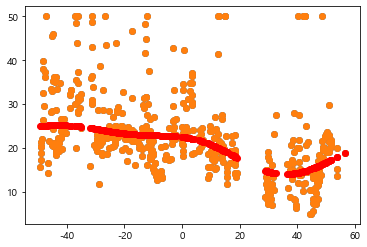

In [99]:
X,y = load_boston(return_X_y = True) 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=123)

#전처리
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVR(kernel='rbf')
model.fit(X_train,y_train)

print('학습결과 : ',model.score(X_train,y_train))
print('테스트결과 : ',model.score(X_test,y_test))

# ##### 차원 축소(feature(변수)의 축소) --> 변수가 많을 때 효과가 큼 --> 회귀보단 분류쪽에 더 어울림
# ##### 최적의 변수들만 사용하자, 중요한 변수만 남기자 


X_comp=TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y)

# ? TSNE

model.fit(X_comp,y)

predict = model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp,predict,color='r')

## 전처리 까지 포함, fit 이나 transform 들을 자동으로  

estimator=make_pipeline(StandardScaler(),SVR(kernel='linear'))
cv=cross_validate(estimator=estimator,
               X=X,
               y=y,
               cv=5,
               n_jobs=multiprocessing.cpu_count(),
              verbose=True) # cpu를 몇개 할 것인가?
# 평균값
print('cross validate 평균:', cv['test_score'].mean())
# ? cross_validate

multiprocessing.cpu_count()

from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler',StandardScaler()),('model',SVR(kernel='rbf'))])
params = [{'model__kernel':['rbf','polynomial','sigmoid']}]
gs = GridSearchCV(estimator=pipe,
                 param_grid=params,
                 n_jobs=multiprocessing.cpu_count(),
                 cv=5,
                 verbose=True)
gs.fit(X,y)

print(gs.best_params_) # 최적의 파라미터
print(gs.best_estimator_) # 어떤 모델을 사용하고 있는지 --> 앙상블일때 쓰면 좋음

pipe = Pipeline([("scaler", StandardScaler()), ("model", SVR(kernel="rbf"))])
params = [
    {
        "model__gamma":["scale", "auto"],
        "model__C":[1.0, 0.1, 0.01],
        "model__epsilon":[1.0, 0.1, 0.01]
    }
]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X, y)
print('최적의 파라미터 :',gs.best_params_) # 최적의 파라미터

model = SVR(kernel='rbf',C=1.0,gamma='scale',epsilon=0.01)
model.fit(X_train,y_train)

print('학습결과 : ',model.score(X_train,y_train))
print('테스트결과 : ',model.score(X_test,y_test))

#### 2) Diabetes Sample

학습결과 :  0.15345164466149952
테스트결과 :  0.18096718824416858


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'model__C': 1.0, 'model__epsilon': 1.0, 'model__gamma': 'auto'}
0.3500140931673538
학습결과 :  0.3726520070304975
테스트결과 :  0.3905617056363221


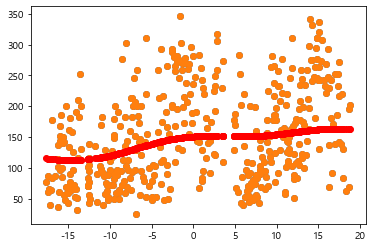

In [113]:
X,y= load_diabetes(return_X_y=True)
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=.2,random_state=123)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVR(kernel='rbf')
model.fit(X_train,y_train)
print('학습결과 : ',model.score(X_train,y_train))
print('테스트결과 : ',model.score(X_test,y_test))

##### 차원축소해보기 
X_comp=TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y)

model.fit(X_comp,y)

predict = model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp,predict,color='r')

estimator = make_pipeline(StandardScaler(), SVR(kernel="rbf"))
cross_validate(
    estimator=estimator,
    X = X,
    y = y,
    cv = 5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

pipe = Pipeline([("scaler", StandardScaler()), ("model", SVR(kernel="sigmoid"))])
params = [
    {
        "model__gamma":["scale", "auto"],
        "model__C":[1.0, 0.1, 0.01],
        "model__epsilon":[1.0, 0.1, 0.01]
    }
]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X, y)

print(gs.best_params_) 
print(gs.best_score_)

model = SVR(kernel='sigmoid',C=1.0,gamma='auto',epsilon=1.0)
model.fit(X_train,y_train)

print('학습결과 : ',model.score(X_train,y_train))
print('테스트결과 : ',model.score(X_test,y_test))

### (7) LinearSVC
- 분류 

#### 1). breast cancer Sample

In [117]:
X,y = load_breast_cancer(return_X_y = True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123)

#전처리
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVC(kernel='linear')
model.fit(X_train,y_train)
print('학습결과 : ',model.score(X_train,y_train))
print('테스트결과 : ',model.score(X_test,y_test))

#적합도 검증
estimator = make_pipeline(StandardScaler(), SVC(kernel="linear"))
cross_validate(
    estimator=estimator,
    X = X,
    y = y,
    cv = 5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

#최적의 파라미터 찾기
pipe = Pipeline([("scaler", StandardScaler()), ("model", SVC(kernel="linear"))])
params = [
    {
        "model__gamma":["scale", "auto"],
        "model__C":[1.0, 0.1, 0.01]
        
    }
]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X, y)

print(gs.best_params_) 
print(gs.best_score_)

#최고의 결과
model = SVC(kernel='linear',C=1.0,gamma='scale')
model.fit(X_train,y_train)

print('학습결과 : ',model.score(X_train,y_train))
print('테스트결과 : ',model.score(X_test,y_test))


학습결과 :  0.9906103286384976
테스트결과 :  0.986013986013986
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'model__C': 0.1, 'model__gamma': 'scale'}
0.9736531594472908
학습결과 :  0.9906103286384976
테스트결과 :  0.986013986013986


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


#### 2) 붓꽃 데이터 

In [118]:
X,y = load_iris(return_X_y = True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123)

#전처리
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVC(kernel='linear')
model.fit(X_train,y_train)
print('학습결과 : ',model.score(X_train,y_train))
print('테스트결과 : ',model.score(X_test,y_test))

#적합도 검증
estimator = make_pipeline(StandardScaler(), SVC(kernel="linear"))
cross_validate(
    estimator=estimator,
    X = X,
    y = y,
    cv = 5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

#최적의 파라미터 찾기
pipe = Pipeline([("scaler", StandardScaler()), ("model", SVC(kernel="linear"))])
params = [
    {
        "model__gamma":["scale", "auto"],
        "model__C":[1.0, 0.1, 0.01]
        
    }
]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X, y)

print(gs.best_params_) 
print(gs.best_score_)

#최고의 결과
model = SVC(kernel='linear',C=1.0,gamma='scale')
model.fit(X_train,y_train)

print('학습결과 : ',model.score(X_train,y_train))
print('테스트결과 : ',model.score(X_test,y_test))

학습결과 :  0.9910714285714286
테스트결과 :  0.9736842105263158
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'model__C': 1.0, 'model__gamma': 'scale'}
0.9666666666666668
학습결과 :  0.9910714285714286
테스트결과 :  0.9736842105263158


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


#### 3) wine sample

In [119]:
X,y = load_wine(return_X_y = True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123)

#전처리
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVC(kernel='linear')
model.fit(X_train,y_train)
print('학습결과 : ',model.score(X_train,y_train))
print('테스트결과 : ',model.score(X_test,y_test))

#적합도 검증
estimator = make_pipeline(StandardScaler(), SVC(kernel="linear"))
cross_validate(
    estimator=estimator,
    X = X,
    y = y,
    cv = 5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

#최적의 파라미터 찾기
pipe = Pipeline([("scaler", StandardScaler()), ("model", SVC(kernel="linear"))])
params = [
    {
        "model__gamma":["scale", "auto"],
        "model__C":[1.0, 0.1, 0.01]
        
    }
]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X, y)

print(gs.best_params_) 
print(gs.best_score_)

#최고의 결과
model = SVC(kernel='linear',C=1.0,gamma='scale')
model.fit(X_train,y_train)

print('학습결과 : ',model.score(X_train,y_train))
print('테스트결과 : ',model.score(X_test,y_test))

학습결과 :  1.0
테스트결과 :  0.9555555555555556
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'model__C': 0.1, 'model__gamma': 'scale'}
0.972063492063492
학습결과 :  1.0
테스트결과 :  0.9555555555555556


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


### (8)  KernelSVC

#### 1) breast cancer sample

#### 2) iris sample

#### 3) wine sample

### (8) 예제

#### 1) 농구선수의 포지션 예측

In [3]:
df = pd.read_csv('data/basketball_stat.csv')
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [5]:
# 포지션 종류 살펴보기 
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

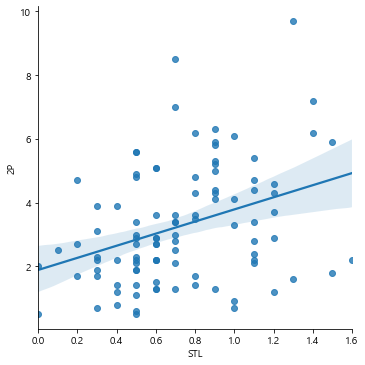

In [9]:
# 분포가 뚜렷한지 분포현황 알아보기 
sns.lmplot('STL','2P',data=df) 

# 결과를 보면 그래프가 무얼 의미하는지 알 수 없음. 

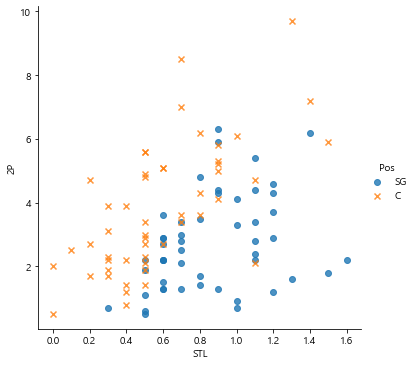

In [11]:
# 회귀선 필요 없고(fit_reg=False), 포지션별 분류가 필요함(hue='Pos').
sns.lmplot('STL','2P',data=df,fit_reg=False,hue='Pos',markers=['o','x']) 
# 결과를 보면 많은 부분이 겹침... 2점 슛과 스틸은 모든 선수들이 하기 때문


In [7]:
df.corr()

,3P,2P,TRB,AST,STL,BLK
3P,1.000000,-0.094914,-0.498036,0.485010,0.353517,-0.534588
2P,-0.094914,1.000000,0.680882,0.396094,0.353558,0.482056
TRB,-0.498036,0.680882,1.000000,0.026689,0.130441,0.707542
AST,0.485010,0.396094,0.026689,1.000000,0.640802,-0.148161
STL,0.353517,0.353558,0.130441,0.640802,1.000000,-0.138208
BLK,-0.534588,0.482056,0.707542,-0.148161,-0.138208,1.000000


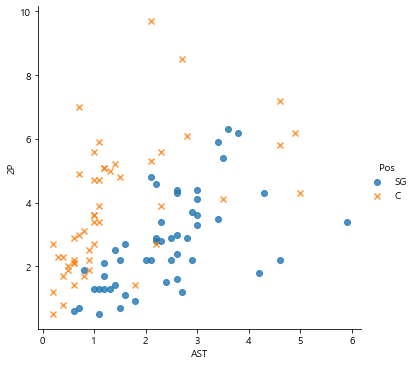

In [12]:
# 2점 슛과, 어시스트 관계 살펴보기 
sns.lmplot('AST','2P',data=df,fit_reg=False,hue='Pos',markers=['o','x']) 
# 결과를 보면 여기도 좀 겹쳐 있음 

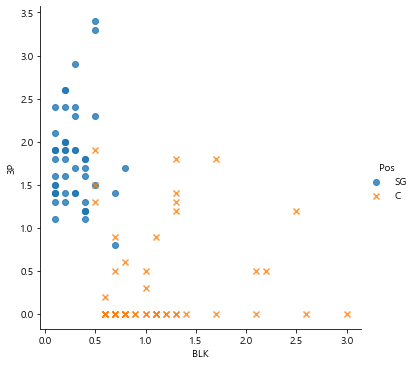

In [13]:
# 블록과 3점 슛 차이
sns.lmplot('BLK','3P',data=df,fit_reg=False,hue='Pos',markers=['o','x']) 
# 뚜렷한 차이가 보임 --> 분류 할 수 있겠다. 블락은 센터가 많이 하고, 3점 슛은 가드가 많이 함. --> 훈련시키면 성능 좋겠다. 알 수 있음


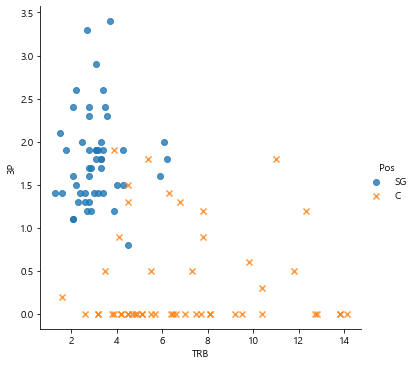

In [14]:
# 리바운드와 3점 슛
sns.lmplot('TRB','3P',data=df,fit_reg=False,hue='Pos',markers=['o','x'])
# 이것도 포지션별 구별이 뚜렷하게 나타남. 

In [15]:
# 포지션 분류 예측 용이한것만 남기고 feature 삭제하기 
df.drop(['2P','AST','STL'],axis=1,inplace=True)

In [16]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [17]:
train,test = train_test_split(df,test_size=0.2)
print(train.shape,test.shape)

(80, 5) (20, 5)


In [19]:
# 훈련용 뽑기
X_train=train[['3P','TRB','BLK']]
y_train=train['Pos']

In [22]:
params=[{
    'kernel':['rbf','poly','sigmoid'],
    'gamma':['scale','auto'],
    'C':[0.01,0.1,1,10,100,1000]
}]
svm = GridSearchCV(SVC(),params).fit(X_train,y_train)

In [24]:
# 테스트용 뽑기
X_test=test[['3P','TRB','BLK']]
y_test=test['Pos']

In [25]:
#예측 해보기
preds = svm.predict(X_test)

In [26]:
# 정확도 뽑기 
print('정확도 :',accuracy_score(y_test,preds))
# 포지션을 95% 정확도로 분류할 수 있다. 
# 나중에 이런 프로그램을 만들 수 있음. svm을 파일로 만들어서 프리딕트로 넘겨주면 가능, 쥬피터에서 매번 실행하는 것이 아니라

정확도 : 0.95


#### 2) 손글씨 이미지
- http://yann.lecun.com/exdb/mnist/


In [41]:
def load_csv(fname):
    labels = []
    images = []
    f = open(fname, 'r')
    for line in f:
        cols = line.split(',')
        
        if len(cols) < 2: # 이게 어떻게 빈줄 건너뛰라는 건가?, 공백도 한글자로 처리되서 
            continue # 빈줄은 건너 뛰게끔
        
        labels.append(int(cols.pop(0)))
        
        vals = list(map(lambda n : round(int(n)/256),cols))
        images.append(vals)
    f.close()
    # 데이터를 0,1로 만 나타나게 하기 위해서 
    return {'y':labels,'X':images}

In [42]:
train = load_csv('data/mnist/train.csv')
test = load_csv('data/mnist/t10k.csv')

In [48]:
print(train['X'][2])
print(train['y'][2])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 

In [49]:
model=SVC().fit(train['X'],train['y'])


In [50]:
preds = model.predict(test['X'])

In [51]:
acc = accuracy_score(test['y'],preds)
print('정확도: ',acc)

정확도:  0.9540918163672655


In [52]:
print(classification_report(test['y'],preds))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       1.00      1.00      1.00        67
           2       0.96      0.95      0.95        55
           3       0.95      0.89      0.92        46
           4       0.96      0.98      0.97        55
           5       0.92      0.94      0.93        50
           6       0.95      0.93      0.94        43
           7       0.92      0.98      0.95        49
           8       0.91      0.97      0.94        40
           9       1.00      0.91      0.95        54

    accuracy                           0.95       501
   macro avg       0.95      0.95      0.95       501
weighted avg       0.96      0.95      0.95       501



In [53]:
pred1 = model.predict([test['X'][220]])
pred1

array([7])

In [54]:
test['y'][220]

7

In [ ]:
pred1 = model.predict([test['X'][220]])
pred1

In [60]:
plt.imshow(np.array(test['X'][220].reshape(28,28)))

AttributeError: 'list' object has no attribute 'reshape'

In [62]:

input_form = """
<table>
<td style="border-style: none;">
<div style="border: solid 2px #666; width: 143px; height: 144px;">
<canvas width="140" height="140"></canvas>
</div></td>
<td style="border-style: none;">
<button onclick="clear_value()">Clear</button>
</td>
</table>
"""

javascript = """
<script type="text/Javascript">
    var pixels = [];
    for (var i = 0; i < 28*28; i++) pixels[i] = 0
    var click = 0;
    var canvas = document.querySelector("canvas");
    canvas.addEventListener("mousemove", function(e){
        if (e.buttons == 1) {
            click = 1;
            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";
            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);
            x = Math.floor(e.offsetY * 0.2)
            y = Math.floor(e.offsetX * 0.2) + 1
            for (var dy = 0; dy < 2; dy++){
                for (var dx = 0; dx < 2; dx++){
                    if ((x + dx < 28) && (y + dy < 28)){
                        pixels[(y+dy)+(x+dx)*28] = 1
                    }
                }
            }
        } else {
            if (click == 1) set_value()
            click = 0;
        }
    });
    
    function set_value(){
        var result = ""
        for (var i = 0; i < 28*28; i++) result += pixels[i] + ","
        var kernel = IPython.notebook.kernel;
        kernel.execute("image = [" + result + "]");
    }
    
    function clear_value(){
        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";
        canvas.getContext("2d").fillRect(0, 0, 140, 140);
        for (var i = 0; i < 28*28; i++) pixels[i] = 0
    }
</script>
"""

In [66]:
from IPython.display import HTML
HTML(input_form+javascript)

In [67]:
# 내가 그린 이미지를 0과 1로 표현
print(image)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 

In [72]:
preds=model.predict([image])
preds

array([2])

In [73]:
# 훈련한 것을 써먹어야지 --> 훈련 시킨것을 저장해서 사용할 수 있게 , 2진 파일로 저장

## 4.학급 모델 저장
- serialization
        + pickle
        + joblib

In [95]:
# 2 진 파일로 저장
import pickle
phone = {'tom':'111-1111','츄':'120-1233'}
product=['마우스','키보드']

obj = (phone,product)
obj[1][0]
obj[0]['tom']

# 저장할 때
f= open('data/obj1.pickle','wb')
pickle.dump(obj,f)

f.close()

In [96]:
# 불러올 때
f= open('data/obj1.pickle','rb')
obj2 = pickle.load(f)
obj2

({'tom': '111-1111', '츄': '120-1233'}, ['마우스', '키보드'])

In [97]:
##### 학습된 데이터 모델 저장 

iris = load_iris()
X,y = iris.data,iris.target

clf=LogisticRegression(random_state=0,max_iter=10000)
clf.fit(X,y)

LogisticRegression(max_iter=10000, random_state=0)

In [98]:
f = open('data/iris_logistic.pickle','wb')
pickle.dump(clf,f)
f.close()

In [99]:
f= open('data/iris_logistic.pickle','rb')
clf2= pickle.load(f)

# 프로그램 만들기 
print(clf2.predict(X))
f.close()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### - joblivb

In [100]:
import joblib

# 보다 간단하게


In [101]:
joblib.dump(clf,'data/iris_logistic.pkl')

['data/iris_logistic.pkl']

In [102]:
clf3= joblib.load('data/iris_logistic.pkl')

In [103]:
print(clf3.predict(X))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
